# Importando módulos 

In [1]:
import obspy
import os
import glob
import numpy as np
from collections import defaultdict
import pandas as pd
import glidertools as gt


#para plotar as figuras
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition,inset_axes
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, HourLocator, MinuteLocator, SecondLocator, DateFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from datetime import datetime,timedelta,date
from tqdm import tqdm

from shapely.geometry.polygon import LinearRing

import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Lista de Funções 

In [2]:
def dm(x):
    south = False
    
    if x<0:
        south = True
        x = abs(x)
        
    degrees = int(x) // 100
    minutes = x - 100*degrees
    
    x = degrees + minutes/60
    if south:
        x = -x
    return x

In [3]:
def check_datetime_in_period(datetime_lst,dataf):
    '''
    Function to check if the dates in data set are inside the chosen time period
    
    '''
    array_to_plot_by_xlim = []
    for x,c in enumerate(datetime_lst):
        lista_temp = []
        for t,y in enumerate(dataf['DATETIME'].values):
            if y == c.date():
                lista_temp.append(np.array(dataf[dataf['DATETIME'] == y]['NUMBER_HOUR'].tolist()[0]))
        array_to_plot_by_xlim.append(lista_temp)
   
    data_x_axis = []
    for x,c in enumerate(array_to_plot_by_xlim):
        if c != []:
            data_x_axis.append(c[0])
        else:
            data_x_axis.append(np.zeros_like(np.arange(24)))

    data_x_axis = np.array(data_x_axis).T

    return data_x_axis
#----------------------------

In [4]:
FOLDER_OUTPUT = '/home/diogoloc/dados_posdoc/gliders_project/OUTPUT/'

# Extraindo informações dos arquivos ".log" e criando um dataframe em PANDAS

In [5]:
os.chdir('/home/diogoloc/dados_posdoc/gliders_project/gliders_data/NetCDF_data/campanha_08/')

In [6]:
filenames = sorted(glob.glob('*.nc'))

In [7]:
print(len(filenames))

42


%columns: elaps_t_0000,elaps_t,depth,head,pitchAng,rollAng,pitchCtl,rollCtl,vbdCC,rec,GC_phase,sbect.condFreq,sbect.tempFreq

In [8]:
names = [
    'latitude',
    'longitude',
    'depth'
]

ds_dict_lst = []
for i in filenames:
    ds_dict_lst.append(gt.load.seaglider_basestation_netCDFs(filenames[20], names,verbose=False))


DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point

In [9]:
ds_dict0 = gt.load.seaglider_basestation_netCDFs(filenames[-2], names,verbose=True)
print(ds_dict0)

ds_dict = gt.load.seaglider_basestation_netCDFs(filenames[19], names,verbose=True)
print(ds_dict)


DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 172.98it/s]


{'sg_data_point': <xarray.Dataset>
Dimensions:        (sg_data_point: 2745)
Dimensions without coordinates: sg_data_point
Data variables:
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2019-05-09T06:32:16 ... 201...
    latitude       (sg_data_point) float64 -25.94 -25.94 ... -25.93 -25.93
    longitude      (sg_data_point) float64 -45.03 -45.03 ... -45.07 -45.07
    ctd_time       (sg_data_point) float64 1.557e+09 1.557e+09 ... 1.557e+09
    depth          (sg_data_point) float64 1.15 1.15 1.15 ... 0.45 0.33 0.36
    dives          (sg_data_point) float64 131.0 131.0 131.0 ... 131.5 131.5
Attributes:
    date_created:             2023-04-03 18:13:11
    number_of_dives:          131.0
    files:                    ['p6570131.nc']
    time_coverage_start:      2019-05-09 06:32:16
    time_coverage_end:        2019-05-09 13:59:35
    geospatial_vertical_min:  0.3299976951105463
    geospatial_vertical_max:  954.3107667064623
    geospatial_lat_min:       -25.9412497982387
    geospat

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.55it/s]


{'sg_data_point': <xarray.Dataset>
Dimensions:        (sg_data_point: 804)
Dimensions without coordinates: sg_data_point
Data variables:
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2019-05-05T00:02:22 ... 201...
    latitude       (sg_data_point) float64 -26.31 -26.31 -26.31 ... -26.3 -26.3
    longitude      (sg_data_point) float64 -45.04 -45.04 ... -45.05 -45.05
    ctd_time       (sg_data_point) float64 1.557e+09 1.557e+09 ... 1.557e+09
    depth          (sg_data_point) float64 1.16 1.1 1.17 1.3 ... 2.52 1.04 0.16
    dives          (sg_data_point) float64 52.0 52.0 52.0 ... 52.5 52.5 52.5
Attributes:
    date_created:             2023-04-03 18:13:12
    number_of_dives:          52.0
    files:                    ['p6570052.nc']
    time_coverage_start:      2019-05-05 00:02:22
    time_coverage_end:        2019-05-05 02:11:43
    geospatial_vertical_min:  0.15999469823376591
    geospatial_vertical_max:  932.4560034658997
    geospatial_lat_min:       -26.305595276866253
  

In [10]:
ds_dict_lst_lat = []
ds_dict_lst_lon = []
ds_dict_lst_dpt = []
ds_dict_lst_time = []
ds_dict_lst_dive = []

for i in filenames:
    dic_ds = gt.load.seaglider_basestation_netCDFs(i, names,verbose=False)
    ds_dict_lst_dive.append(dic_ds['sg_data_point'].attrs['number_of_dives'])
    ds_dict_lst_lat.append(dic_ds['sg_data_point']['latitude'].mean())
    ds_dict_lst_lon.append(dic_ds['sg_data_point']['longitude'].mean())
    ds_dict_lst_dpt.append(dic_ds['sg_data_point']['depth'].max())
    ds_dict_lst_time.append(obspy.UTCDateTime(dic_ds['sg_data_point']['ctd_time'].min()).datetime)


DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point
{latitude, longitude, ctd_time, depth}

DIMENSION: sg_data_point

In [11]:
date_to_plot_lst = np.array([mdates.date2num(i) for i in ds_dict_lst_time])
depth_to_plot_lst = np.array([i*-1 for i in ds_dict_lst_dpt])

In [12]:
date_to_plot = np.array([mdates.date2num(obspy.UTCDateTime(i).datetime) for i in ds_dict['sg_data_point']['ctd_time']])
depth_to_plot = np.array([i*-1 for i in ds_dict['sg_data_point']['depth']])

date_to_plot0 = np.array([mdates.date2num(obspy.UTCDateTime(i).datetime) for i in ds_dict0['sg_data_point']['ctd_time']])
depth_to_plot0 = np.array([i*-1 for i in ds_dict0['sg_data_point']['depth']])

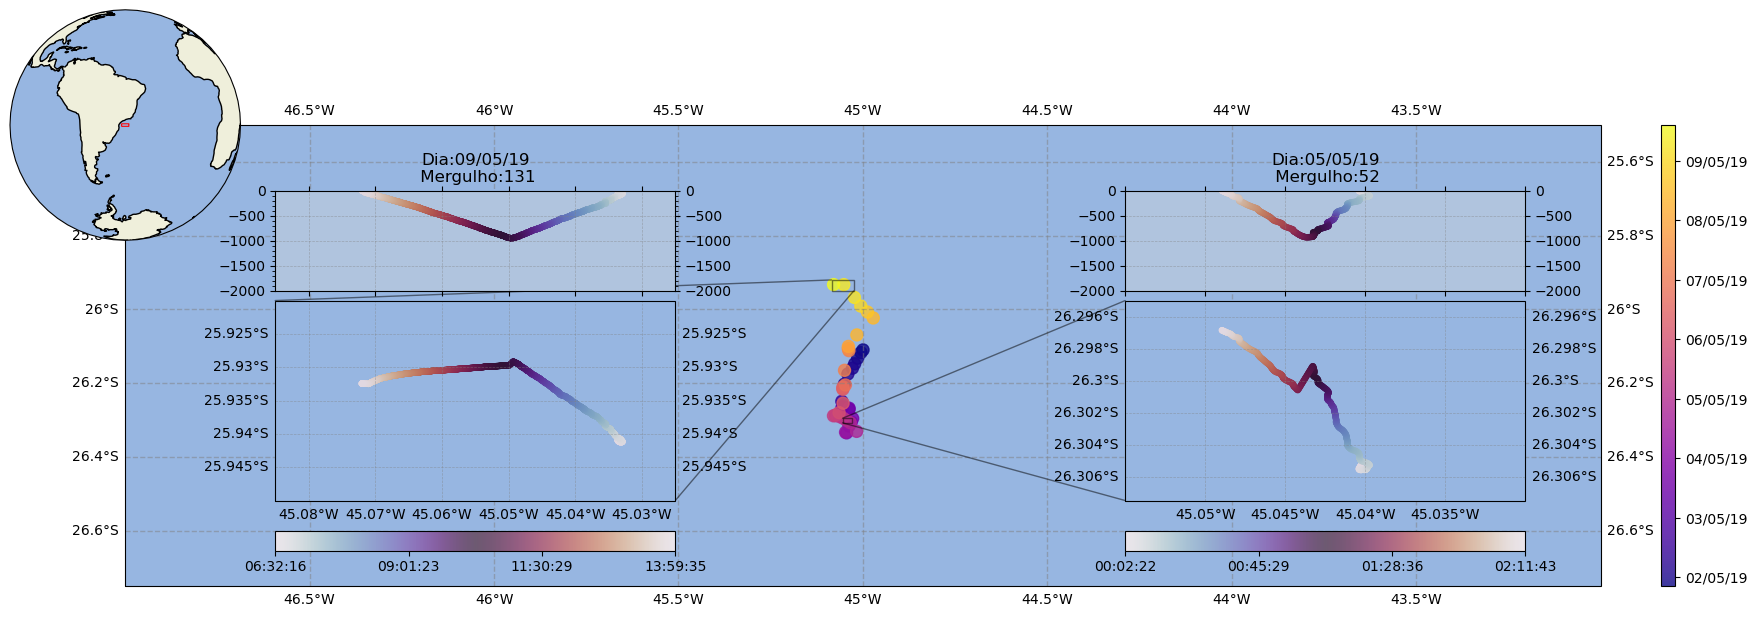

In [55]:
# Create a figure
# set up the plot and create a GeoAxes:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1,figsize=(20,10), subplot_kw=dict(projection=proj))

# ----------------------------------------------------------------------------------------------------------
# Limit the extent of the map to a small longitude/latitude range.
latmin=-26.75
latmax=-25.5
lonmin=-47
lonmax=-43

ax.set_extent([lonmin,lonmax, latmin, latmax], crs=ccrs.Geodetic())

# ----------------------------------------------------------------------------------------------------------
# Ploting lat/lon values

h = ax.scatter(ds_dict_lst_lon,ds_dict_lst_lat,c=date_to_plot_lst,marker='o',alpha=0.8,cmap='plasma',s=75,transform=proj)
# ----------------------------------------------------------------------------------------------------------
# Adding background map 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=0.3)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')

# ----------------------------------------------------------------------------------------------------------
# Adding colorbar
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="1%", pad=0.6, axes_class=plt.Axes)

fig.add_axes(ax_cb)
cb = plt.colorbar(h, cax=ax_cb)
cb.ax.yaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))

#####################################################
# Adding inset axes LEFT
#####################################################

# ----------------------------------------------------------------------------------------------------------
axins0 = plt.axes([0.2, 0.35, 0.2, 0.2],projection=proj)

dz0 = depth_to_plot0
norm = colors.Normalize(dz0.min(), dz0.max())
colors_map = cm.plasma(norm(dz0))
j0 = axins0.scatter(ds_dict0['sg_data_point']['longitude'], ds_dict0['sg_data_point']['latitude'], c=date_to_plot0,marker='.',alpha=0.7,cmap='twilight',s=50,transform=proj)

axins0.add_feature(cfeature.LAND)
axins0.add_feature(cfeature.OCEAN)
axins0.add_feature(cfeature.COASTLINE,linewidth=0.3)
axins0.add_feature(cfeature.BORDERS, linestyle=':',linewidth=0.3)
axins0.gridlines(crs=ccrs.PlateCarree(), draw_labels=["bottom", "left", "right"],linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# subregion of the original image
x10 = -45.085
x20 = -45.025
y10 = -25.95
y20 = -25.92

axins0.set_xlim(x10, x20)
axins0.set_ylim(y10, y20)
axins0.tick_params(axis='both',which="both",bottom=True, top=True, left=True, right=True,labelbottom=True, labeltop=False, labelleft=True, labelright=True)

# ----------------------------------------------------------------------------------------------------------
# Adding ZOOM
ax.indicate_inset_zoom(axins0, edgecolor="black")

# ----------------------------------------------------------------------------------------------------------
ax_histx0 = plt.axes([0.2, 0.56, 0.2, 0.1],sharex=axins0,facecolor='lightsteelblue')
ax_histx0.scatter(ds_dict0['sg_data_point']['longitude'], depth_to_plot0, c=date_to_plot0,marker='.',alpha=0.7,cmap='twilight',s=50)
ax_histx0.grid(linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax_histx0.set_title("Dia:"+mdates.num2date(date_to_plot0[0]).strftime('%d/%m/%y')+"\n Mergulho:"+str(int(ds_dict0['sg_data_point'].attrs['number_of_dives'])))
ax_histx0.tick_params(axis='both',which="both",bottom=True, top=True, left=True, right=True,labelbottom=False, labeltop=False, labelleft=True, labelright=True)
ax_histx0.set_ylim(-2000,0)
ax_histx0.yaxis.set_major_locator(MultipleLocator(500))
ax_histx0.yaxis.set_minor_locator(MultipleLocator(100))

# ----------------------------------------------------------------------------------------------------------
# Adding colorbar

cax0 = plt.axes([0.2, 0.3, 0.2, 0.02])
date_colorbar0 = np.linspace(date_to_plot0.min(), date_to_plot0.max(), 4, endpoint=True)
cb0 = plt.colorbar(j0, cax=cax0,orientation='horizontal',ticks=date_colorbar0)
cb0.ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

#####################################################
# Adding inset axes RIGHT
#####################################################

axins = plt.axes([0.625, 0.35, 0.2, 0.2],projection=proj)

dz = depth_to_plot
norm = colors.Normalize(dz.min(), dz.max())
colors_map = cm.plasma(norm(dz))
j = axins.scatter(ds_dict['sg_data_point']['longitude'], ds_dict['sg_data_point']['latitude'], c=date_to_plot,marker='.',alpha=0.7,cmap='twilight',s=50,transform=proj)

axins.add_feature(cfeature.LAND)
axins.add_feature(cfeature.OCEAN)
axins.add_feature(cfeature.COASTLINE,linewidth=0.3)
axins.add_feature(cfeature.BORDERS, linestyle=':',linewidth=0.3)

# ----------------------------------------------------------------------------------------------------------
# Adding grid 
axins.gridlines(crs=ccrs.PlateCarree(), draw_labels=["bottom", "left", "right"],linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# subregion of the original image
x1 = -45.055
x2 = -45.030
y1 = -26.3075
y2 = -26.295
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both',which="both",bottom=True, top=True, left=True, right=True,labelbottom=True, labeltop=False, labelleft=True, labelright=True)

# ----------------------------------------------------------------------------------------------------------
# Adding ZOOM
ax.indicate_inset_zoom(axins, edgecolor="black")

# ----------------------------------------------------------------------------------------------------------
ax_histx = plt.axes([0.625, 0.56, 0.2, 0.1],sharex=axins,facecolor='lightsteelblue')
ax_histx.scatter(ds_dict['sg_data_point']['longitude'], depth_to_plot, c=date_to_plot,marker='.',alpha=0.7,cmap='twilight',s=50)
ax_histx.grid(linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax_histx.set_title("Dia:"+mdates.num2date(date_to_plot[0]).strftime('%d/%m/%y')+"\n Mergulho:"+str(int(ds_dict['sg_data_point'].attrs['number_of_dives'])))
ax_histx.tick_params(axis='both',which="both",bottom=True, top=True, left=True, right=True,labelbottom=False, labeltop=False, labelleft=True, labelright=True)
ax_histx.set_ylim(-2000,0)
ax_histx.yaxis.set_major_locator(MultipleLocator(500))
ax_histx.yaxis.set_major_locator(MultipleLocator(500))

# ----------------------------------------------------------------------------------------------------------
# Adding colorbar
cax = plt.axes([0.625, 0.3, 0.2, 0.02])
date_colorbar = np.linspace(date_to_plot.min(), date_to_plot.max(), 4, endpoint=True)
cb = plt.colorbar(j, cax=cax,orientation='horizontal',ticks=date_colorbar)
cb.ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ----------------------------------------------------------------------------------------------------------
# Adding global location map
# inset location relative to main plot (ax) in normalized units
inset_x = 0
inset_y = 1
inset_size = 0.5

# Adding Geoaxes
ax2 = plt.axes([0, 0, 1, 1], projection=ccrs.Orthographic(central_latitude=(latmin + latmax)/2,central_longitude=(lonmin + lonmax) / 2))
ax2.set_global()

# Adding background map 
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)

# Adding inset geoaxes position
ip = InsetPosition(ax, [inset_x - inset_size / 2,
                        inset_y - inset_size / 2,
                        inset_size,
                        inset_size])
ax2.set_axes_locator(ip)


# Adding red rectangle position
nvert = 100
lons = np.r_[np.linspace(lonmin, lonmin, nvert),
             np.linspace(lonmin, lonmax, nvert),
             np.linspace(lonmax, lonmax, nvert)].tolist()
lats = np.r_[np.linspace(latmin, latmax, nvert),
             np.linspace(latmax, latmax, nvert),
             np.linspace(latmax, latmin, nvert)].tolist()

ring = LinearRing(list(zip(lons, lats)))
ax2.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=0.75)